## Understanding the business


In [41]:


# load libraries before using any function
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pylab 
import scipy.stats as stats
import seaborn as sns

In [42]:
df = pd.read_csv('encuesta1.csv',)
df.head(100)


,Do you own a vehicle?,How many free seats do you usually have when you travel to the university?,What are your usual class schedules?,What is your postal code?,In which neighborhood or area do you live?,Where do you usually take the bus to college?
0,Yes,5.0,14:10 - 20:50,97070,Cholul,NaN
1,Yes,6.0,14:10 - 20:50,97119,Montes de Amé,NaN
2,Yes,6.0,7:00 - 14:10,97070,Cholul,NaN
3,Yes,6.0,7:00 - 14:10,97100,Montes de Amé,NaN
4,Yes,1.0,14:10 - 20:50,97119,Centro,NaN
...,...,...,...,...,...,...
95,Yes,5.0,7:00 - 14:10,97130,Francisco de Montejo,NaN
96,Yes,2.0,14:10 - 20:50,97000,Altabrisa,NaN
97,Yes,1.0,7:00 - 14:10,97143,Chuburná,NaN
98,Yes,4.0,7:00 - 14:10,97000,Temózon Norte,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Do you own a vehicle?                                                       2000 non-null   object 
 1   How many free seats do you usually have when you travel to the university?  1000 non-null   float64
 2   What are your usual class schedules?                                        2000 non-null   object 
 3   What is your postal code?                                                   2000 non-null   int64  
 4   In which neighborhood or area do you live?                                  2000 non-null   object 
 5   Where do you usually take the bus to college?                               1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 

In [44]:
df.shape

(2000, 6)

In [45]:
df.describe()

,How many free seats do you usually have when you travel to the university?,What is your postal code?
count,1000.000000,2000.00000
mean,3.410000,97121.18700
std,1.718969,51.36576
min,1.000000,97000.00000
25%,2.000000,97100.00000
50%,3.000000,97139.00000
75%,5.000000,97147.00000
max,6.000000,97203.00000


In [46]:
#found missing values

df.isnull().sum()



Do you own a vehicle?                                                            0
How many free seats do you usually have when you travel to the university?    1000
What are your usual class schedules?                                             0
What is your postal code?                                                        0
In which neighborhood or area do you live?                                       0
Where do you usually take the bus to college?                                 1000
dtype: int64

In [47]:
df.dtypes

Do you own a vehicle?                                                          object
How many free seats do you usually have when you travel to the university?    float64
What are your usual class schedules?                                           object
What is your postal code?                                                       int64
In which neighborhood or area do you live?                                     object
Where do you usually take the bus to college?                                  object
dtype: object

In [48]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns




## Data preprocessing

In [49]:
#pipeline for numerical columns and categorical columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer



numerical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])




categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(sparse=False)) ])





In [50]:
numerical_transformer

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [51]:
categorical_transformer

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot', OneHotEncoder(sparse=False))])

In [52]:
preprocessor = ColumnTransformer( transformers=[ ('num', numerical_transformer, numerical_columns), ('cat', categorical_transformer, categorical_columns) ])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['How many free seats do you usually have when you travel to the university?', 'What is your postal code?'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(sparse=False))]),
                                 Index(['Do you own a vehicle?', 'What are your usual class schedules?',
       'In which neighborhood or area do you live?',
       'Where do you usually take the bus to college?'],
      dtype='object'))])

In [53]:
preprocesing_data = preprocessor.fit_transform(df)

preprocesing_data.shape



c:\Users\jnoh5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(2000, 27)

##  model and evaluation

### Elbow Method for optimal value of k in KMeans

For determining  K(numbers of clusters) we use Elbow method.  Elbow Method is a technique that we use to determine the number of centroids(k) to use in a k-means clustering algorithm.  In this method to determine the k-value we continuously iterate for k=1 to k=n (Here n is the hyperparameter that we choose as per our requirement). For every value of k, we calculate the within-cluster sum of squares (WCSS) value.


c:\Users\jnoh5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jnoh5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jnoh5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jnoh5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

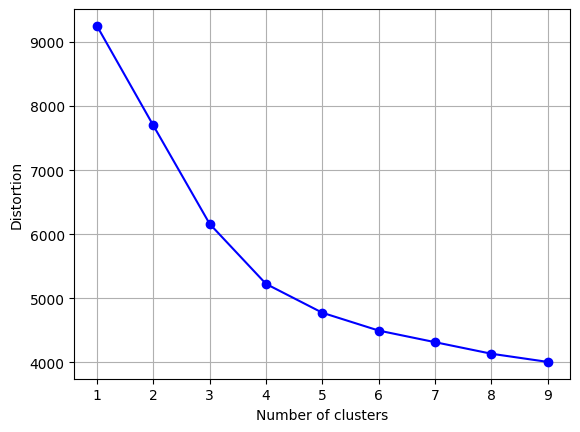

In [54]:
# do a elbow plot to find the best number of clusters

from sklearn.cluster import KMeans
from sklearn import metrics

# k means determine k
range_values = range(1, 10)

distortions = []
for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(preprocesing_data)
    distortions.append(kmeans.inertia_)
    
# Plot the elbow

plt.plot(range_values, distortions, marker='o',  color='b')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()




In [55]:
# plotting clusters in 2D

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(preprocesing_data)

principal_components.shape 

(2000, 2)

In [56]:
# Applying K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(preprocesing_data)


print(clusters)


[2 2 2 ... 0 0 0]


c:\Users\jnoh5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [57]:
data_with_clusters = df.copy()
data_with_clusters['Cluster'] = clusters
data_with_clusters.head(100)


,Do you own a vehicle?,How many free seats do you usually have when you travel to the university?,What are your usual class schedules?,What is your postal code?,In which neighborhood or area do you live?,Where do you usually take the bus to college?,Cluster
0,Yes,5.0,14:10 - 20:50,97070,Cholul,NaN,2
1,Yes,6.0,14:10 - 20:50,97119,Montes de Amé,NaN,2
2,Yes,6.0,7:00 - 14:10,97070,Cholul,NaN,2
3,Yes,6.0,7:00 - 14:10,97100,Montes de Amé,NaN,2
4,Yes,1.0,14:10 - 20:50,97119,Centro,NaN,1
...,...,...,...,...,...,...,...
95,Yes,5.0,7:00 - 14:10,97130,Francisco de Montejo,NaN,2
96,Yes,2.0,14:10 - 20:50,97000,Altabrisa,NaN,3
97,Yes,1.0,7:00 - 14:10,97143,Chuburná,NaN,1
98,Yes,4.0,7:00 - 14:10,97000,Temózon Norte,NaN,3


In [58]:
numerical_summary = data_with_clusters.groupby(['Cluster'])[numerical_columns].mean()
categorical_summary = data_with_clusters[categorical_columns].astype(str)
categorical_summary['Cluster'] = data_with_clusters['Cluster']
categorical_summary = categorical_summary.groupby('Cluster').agg(lambda x: x.value_counts().index[0])

cluster_summary = pd.concat([numerical_summary, categorical_summary], axis=1)


cluster_summary

,How many free seats do you usually have when you travel to the university?,What is your postal code?,Do you own a vehicle?,What are your usual class schedules?,In which neighborhood or area do you live?,Where do you usually take the bus to college?
Cluster,,,,,,
0,NaN,97136.330735,No,14:10 - 20:50,Chuburná,Near Francisco de Montejo
1,1.944206,97133.266094,Yes,7:00 - 14:10,Ciudad Caucel,nan
2,4.956422,97132.676606,Yes,14:10 - 20:50,Temózon Norte,nan
3,3.500000,97000.000000,No,14:10 - 20:50,Santa Gertrudis Copó,nan


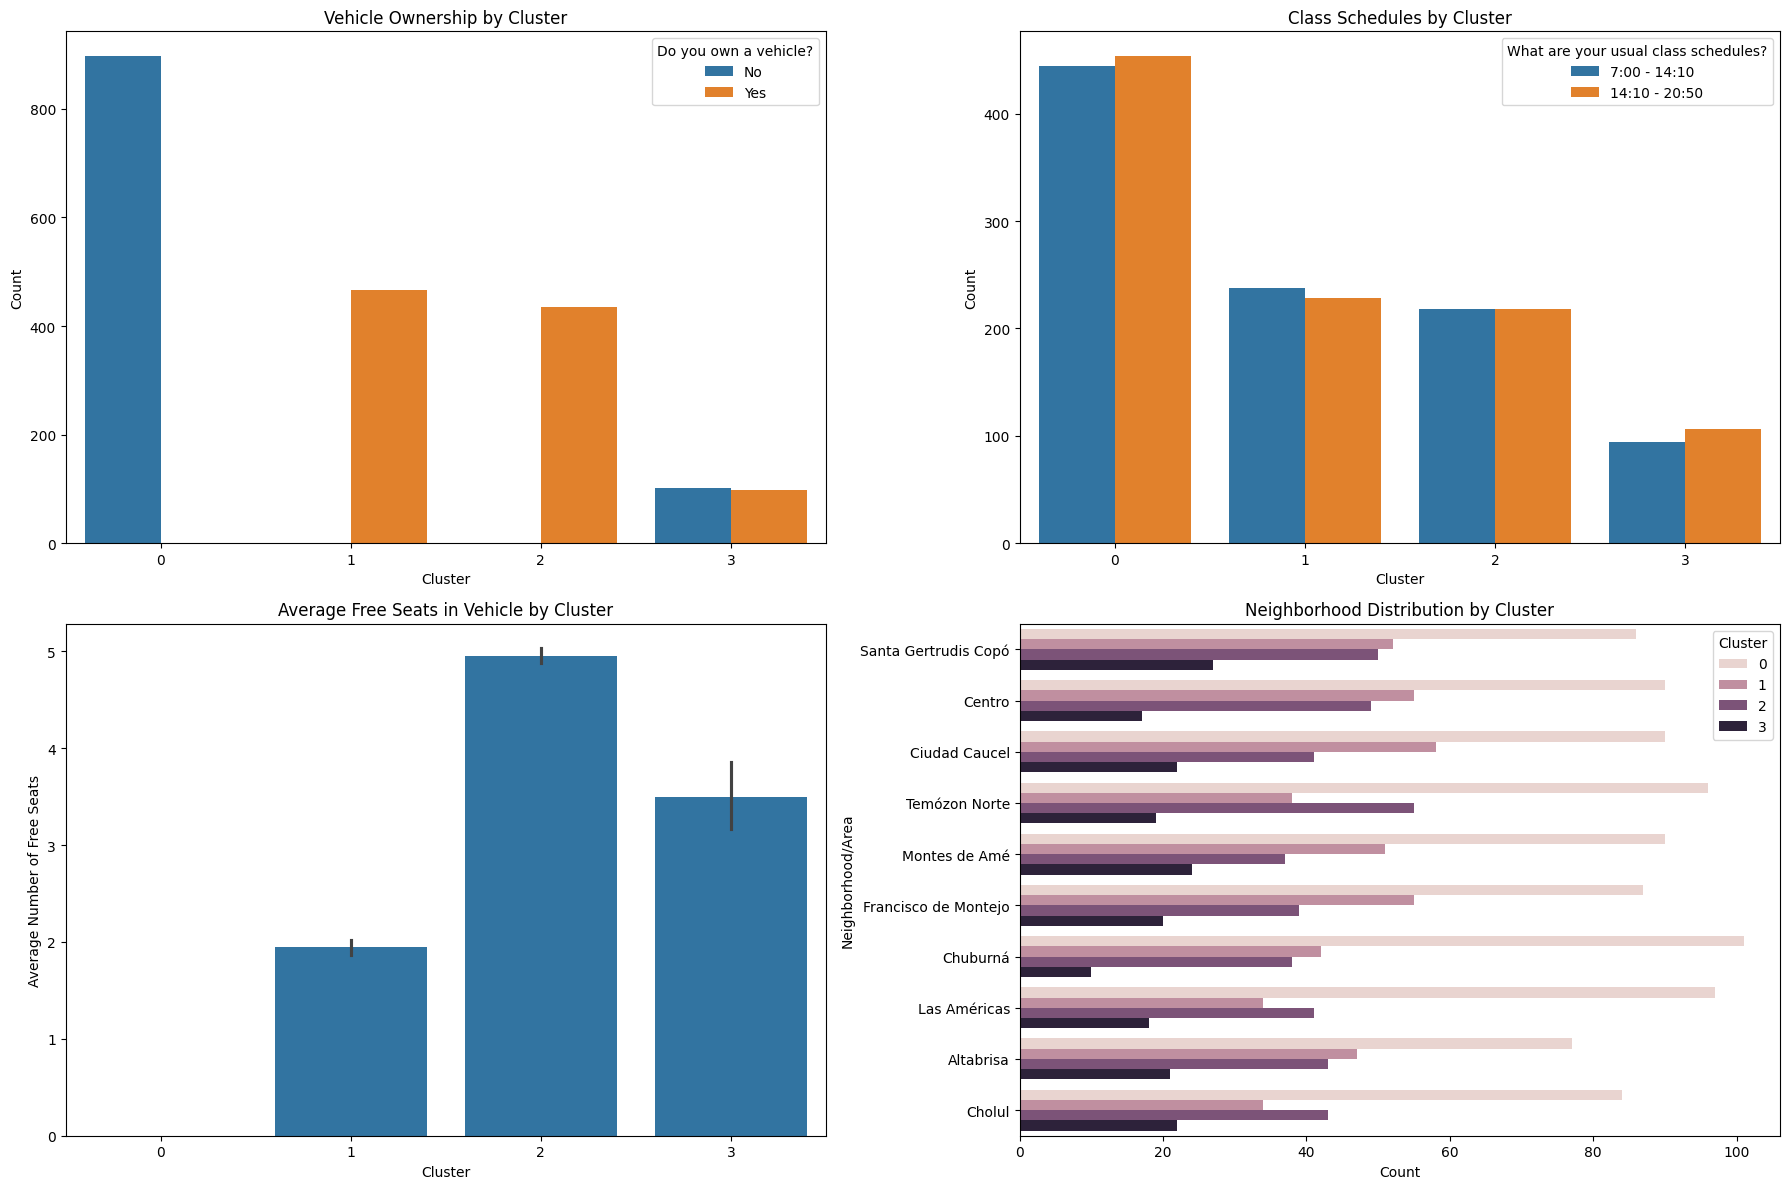

In [59]:
# visualization and interpretation of the clusters

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)

sns.countplot(data=data_with_clusters, x='Cluster', hue='Do you own a vehicle?')
plt.title('Vehicle Ownership by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')


plt.subplot(2, 2, 2)
sns.countplot(data=data_with_clusters, x='Cluster', hue='What are your usual class schedules?')
plt.title('Class Schedules by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.barplot(data=data_with_clusters, x='Cluster', y='How many free seats do you usually have when you travel to the university?')
plt.title('Average Free Seats in Vehicle by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Free Seats')


plt.subplot(2, 2, 4)
sns.countplot(data=data_with_clusters, y='In which neighborhood or area do you live?', hue='Cluster', order=data_with_clusters['In which neighborhood or area do you live?'].value_counts().index)
plt.title('Neighborhood Distribution by Cluster')
plt.xlabel('Count')
plt.ylabel('Neighborhood/Area')


plt.tight_layout()
plt.show()


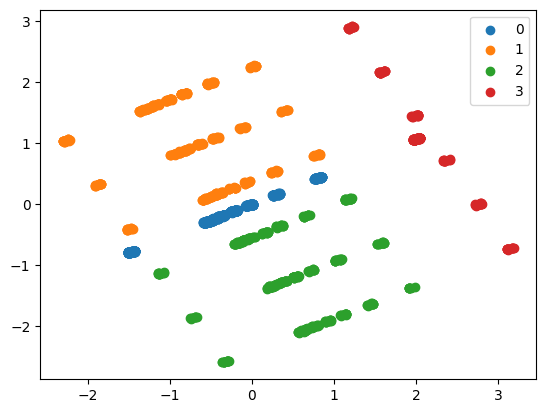

In [60]:

u_clusters = np.unique(clusters)

for i in u_clusters:
    
    plt.scatter(principal_components[clusters == i , 0] , principal_components[clusters == i , 1] , label = i)
plt.legend()

plt.show()

# show the clusters in 3D and show the values of each point in tthe clusters

